<a href="https://colab.research.google.com/github/tharun-0-0-6/sdc/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.8686 - loss: 0.4801 - val_accuracy: 0.9800 - val_loss: 0.0804

🔢 Enter a test image index (0–9999): 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


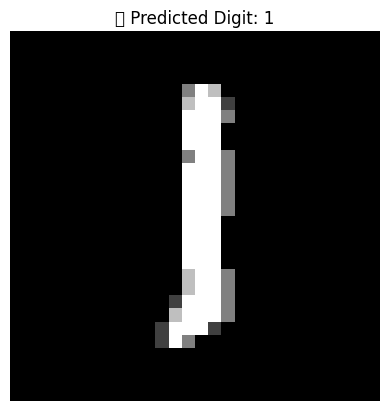

In [ ]:
#CNN Real-Life Example: Handwritten Digit Recognition (MNIST)
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 2: Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Step 3: Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train (single-pass quick training)
model.fit(X_train, y_train_cat, batch_size=128, validation_split=0.1, verbose=1)

# ---------------- USER INPUT SECTION ----------------

index = int(input("\n🔢 Enter a test image index (0–9999): "))
while not (0 <= index < len(X_test)):
    index = int(input("Please enter a valid index between 0 and 9999: "))

# Predict and show
image = X_test[index].reshape(1, 28, 28, 1)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"📷 Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()
